## Coronaviris details for countries

In [1]:
using DataFrames ,UrlDownload;

In [2]:
link = "https://covid.ourworldindata.org/data/owid-covid-data.csv"

"https://covid.ourworldindata.org/data/owid-covid-data.csv"

In [3]:
data = urldownload(link) |> DataFrame
first(data,10)

10×67 DataFrame
 Row │ iso_code  continent  location     date        total_cases  new_cases  n ⋯
     │ String    String?    String       Date…       Float64?     Float64?   F ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ AFG       Asia       Afghanistan  2020-02-24          5.0        5.0    ⋯
   2 │ AFG       Asia       Afghanistan  2020-02-25          5.0        0.0 
   3 │ AFG       Asia       Afghanistan  2020-02-26          5.0        0.0 
   4 │ AFG       Asia       Afghanistan  2020-02-27          5.0        0.0 
   5 │ AFG       Asia       Afghanistan  2020-02-28          5.0        0.0    ⋯
   6 │ AFG       Asia       Afghanistan  2020-02-29          5.0        0.0
   7 │ AFG       Asia       Afghanistan  2020-03-01          5.0        0.0
   8 │ AFG       Asia       Afghanistan  2020-03-02          5.0        0.0
   9 │ AFG       Asia       Afghanistan  2020-03-03          5.0        0.0    ⋯
  10 │ AFG       Asia       Afghanistan  2020-03-04          5.0        0.0
                                                              61 columns omitted

In [4]:
show(data, allcols=true) 

150629×67 DataFrame
    Row │ iso_code  continent  location     date        total_cases  new_cases  new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  total_cases_per_million  new_cases_per_million  new_cases_smoothed_per_million  total_deaths_per_million  new_deaths_per_million  new_deaths_smoothed_per_million  reproduction_rate  icu_patients  icu_patients_per_million  hosp_patients  hosp_patients_per_million  weekly_icu_admissions  weekly_icu_admissions_per_million  weekly_hosp_admissions  weekly_hosp_admissions_per_million  new_tests  total_tests      total_tests_per_thousand  new_tests_per_thousand  new_tests_smoothed  new_tests_smoothed_per_thousand  positive_rate  tests_per_case  tests_units      total_vaccinations  people_vaccinated  people_fully_vaccinated  total_boosters  new_vaccinations  new_vaccinations_smoothed  total_vaccinations_per_hundred  people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  total_boosters_per_hundred  new_vaccinations_sm

In [5]:
df = data[!,[:date,:location,:total_cases,:new_cases,:total_deaths,:weekly_icu_admissions,:female_smokers,:male_smokers,:icu_patients,:new_deaths,:handwashing_facilities,:median_age,:total_vaccinations,:extreme_poverty,:diabetes_prevalence,:people_fully_vaccinated,:new_vaccinations,:total_boosters]]
last(df,10)

10×18 DataFrame
 Row │ date        location  total_cases  new_cases  total_deaths  weekly_icu_ ⋯
     │ Date…       String    Float64?     Float64?   Float64?      Float64?    ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 2021-12-19  Zimbabwe     191673.0     2106.0        4782.0              ⋯
   2 │ 2021-12-20  Zimbabwe     195079.0     3406.0        4805.0 
   3 │ 2021-12-21  Zimbabwe     197768.0     2689.0        4819.0 
   4 │ 2021-12-22  Zimbabwe     199404.0     1636.0        4828.0 
   5 │ 2021-12-23  Zimbabwe     201344.0     1940.0        4855.0              ⋯
   6 │ 2021-12-24  Zimbabwe     202736.0     1392.0        4871.0 
   7 │ 2021-12-25  Zimbabwe     203746.0     1010.0        4885.0 
   8 │ 2021-12-26  Zimbabwe     204351.0      605.0        4891.0 
   9 │ 2021-12-27  Zimbabwe     205449.0     1098.0        4908.0              ⋯
  10 │ 2021-12-28  Zimbabwe     207548.0     2099.0        4940.0 
                                                              13 columns omitted

In [6]:
df[!, :Smokers] = df[:, :female_smokers] + df[:, :male_smokers]

150629-element Vector{Union{Missing, Float64}}:
   missing
   missing
   missing
   missing
   missing
   missing
   missing
   missing
   missing
   missing
   missing
   missing
   missing
  ⋮
 32.3
 32.3
 32.3
 32.3
 32.3
 32.3
 32.3
 32.3
 32.3
 32.3
 32.3
 32.3

In [7]:
last(df,10)

10×19 DataFrame
 Row │ date        location  total_cases  new_cases  total_deaths  weekly_icu_ ⋯
     │ Date…       String    Float64?     Float64?   Float64?      Float64?    ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 2021-12-19  Zimbabwe     191673.0     2106.0        4782.0              ⋯
   2 │ 2021-12-20  Zimbabwe     195079.0     3406.0        4805.0 
   3 │ 2021-12-21  Zimbabwe     197768.0     2689.0        4819.0 
   4 │ 2021-12-22  Zimbabwe     199404.0     1636.0        4828.0 
   5 │ 2021-12-23  Zimbabwe     201344.0     1940.0        4855.0              ⋯
   6 │ 2021-12-24  Zimbabwe     202736.0     1392.0        4871.0 
   7 │ 2021-12-25  Zimbabwe     203746.0     1010.0        4885.0 
   8 │ 2021-12-26  Zimbabwe     204351.0      605.0        4891.0 
   9 │ 2021-12-27  Zimbabwe     205449.0     1098.0        4908.0              ⋯
  10 │ 2021-12-28  Zimbabwe     207548.0     2099.0        4940.0 
                                                              14 columns omitted

In [8]:
show(df, allcols=true)

150629×19 DataFrame
    Row │ date        location     total_cases  new_cases  total_deaths  weekly_icu_admissions  female_smokers  male_smokers  icu_patients  new_deaths  handwashing_facilities  median_age  total_vaccinations  extreme_poverty  diabetes_prevalence  people_fully_vaccinated  new_vaccinations  total_boosters  Smokers   
        │ Date…       String       Float64?     Float64?   Float64?      Float64?               Float64?        Float64?      Float64?      Float64?    Float64?                Float64?    Float64?            Float64?         Float64?             Float64?                 Float64?          Float64?        Float64?  
────────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      1 │ 2020-02-24  Afghanista

In [9]:
sa_data = filter(
x -> any(occursin.(["South Africa"], x.location)),
df
)
last(sa_data,15)

15×19 DataFrame
 Row │ date        location      total_cases  new_cases  total_deaths  weekly_ ⋯
     │ Date…       String        Float64?     Float64?   Float64?      Float64 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 2021-12-14  South Africa    3.20464e6    23857.0       90172.0          ⋯
   2 │ 2021-12-15  South Africa    3.23103e6    26389.0       90226.0 
   3 │ 2021-12-16  South Africa    3.25582e6    24785.0       90262.0 
   4 │ 2021-12-17  South Africa    3.27653e6    20713.0       90297.0 
   5 │ 2021-12-18  South Africa    3.29261e6    16080.0       90345.0          ⋯
   6 │ 2021-12-19  South Africa    3.30807e6    15465.0       90348.0 
   7 │ 2021-12-20  South Africa    3.31658e6     8511.0       90453.0 
   8 │ 2021-12-21  South Africa    3.33201e6    15423.0       90488.0 
   9 │ 2021-12-22  South Africa    3.35311e6    21098.0       90587.0          ⋯
  10 │ 2021-12-23  South Africa    3.37426e6    21156.0       90662.0 
  11 │ 2021-12-24  South Africa    3.39311e6    18847.0       90743.0 
  12 │ 2021-12-25  South Africa    3.40794e6    14828.0       90773.0 
  13 │ 2021-12-26  South Africa    3.41354e6     5603.0       90814.0          ⋯
  14 │ 2021-12-27  South Africa    3.41732e6     3778.0       90829.0 
  15 │ 2021-12-28  South Africa    3.42453e6     7216.0       90854.0 
                                                              14 columns omitted

In [10]:
sas = sa_data[!,[:date,:location,:Smokers,:female_smokers,:male_smokers]]
last(sas,10)

10×5 DataFrame
 Row │ date        location      Smokers   female_smokers  male_smokers 
     │ Date…       String        Float64?  Float64?        Float64?     
─────┼──────────────────────────────────────────────────────────────────
   1 │ 2021-12-19  South Africa      41.3             8.1          33.2
   2 │ 2021-12-20  South Africa      41.3             8.1          33.2
   3 │ 2021-12-21  South Africa      41.3             8.1          33.2
   4 │ 2021-12-22  South Africa      41.3             8.1          33.2
   5 │ 2021-12-23  South Africa      41.3             8.1          33.2
   6 │ 2021-12-24  South Africa      41.3             8.1          33.2
   7 │ 2021-12-25  South Africa      41.3             8.1          33.2
   8 │ 2021-12-26  South Africa      41.3             8.1          33.2
   9 │ 2021-12-27  South Africa      41.3             8.1          33.2
  10 │ 2021-12-28  South Africa      41.3             8.1          33.2

In [11]:
nz_data = filter(
x -> any(occursin.(["New Zealand"], x.location)),
df
)
last(nz_data,15)

15×19 DataFrame
 Row │ date        location     total_cases  new_cases  total_deaths  weekly_i ⋯
     │ Date…       String       Float64?     Float64?   Float64?      Float64? ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 2021-12-14  New Zealand      13143.0       76.0          47.0           ⋯
   2 │ 2021-12-15  New Zealand      13238.0       95.0          48.0 
   3 │ 2021-12-16  New Zealand      13317.0       79.0          49.0 
   4 │ 2021-12-17  New Zealand      13366.0       49.0          49.0 
   5 │ 2021-12-18  New Zealand      13425.0       59.0          49.0           ⋯
   6 │ 2021-12-19  New Zealand      13495.0       70.0          49.0 
   7 │ 2021-12-20  New Zealand      13531.0       36.0          49.0 
   8 │ 2021-12-21  New Zealand      13589.0       58.0          49.0 
   9 │ 2021-12-22  New Zealand      13648.0       59.0          49.0           ⋯
  10 │ 2021-12-23  New Zealand      13719.0       71.0          49.0 
  11 │ 2021-12-24  New Zealand      13719.0        0.0          49.0 
  12 │ 2021-12-25  New Zealand      13855.0      136.0          50.0 
  13 │ 2021-12-26  New Zealand      13899.0       44.0          50.0           ⋯
  14 │ 2021-12-27  New Zealand      13932.0       33.0          50.0 
  15 │ 2021-12-28  New Zealand      13986.0       54.0          51.0 
                                                              14 columns omitted

In [12]:
sm = nz_data[!,[:date,:location,:Smokers,:female_smokers,:male_smokers]]
last(sm,10)

10×5 DataFrame
 Row │ date        location     Smokers   female_smokers  male_smokers 
     │ Date…       String       Float64?  Float64?        Float64?     
─────┼─────────────────────────────────────────────────────────────────
   1 │ 2021-12-19  New Zealand      32.0            14.8          17.2
   2 │ 2021-12-20  New Zealand      32.0            14.8          17.2
   3 │ 2021-12-21  New Zealand      32.0            14.8          17.2
   4 │ 2021-12-22  New Zealand      32.0            14.8          17.2
   5 │ 2021-12-23  New Zealand      32.0            14.8          17.2
   6 │ 2021-12-24  New Zealand      32.0            14.8          17.2
   7 │ 2021-12-25  New Zealand      32.0            14.8          17.2
   8 │ 2021-12-26  New Zealand      32.0            14.8          17.2
   9 │ 2021-12-27  New Zealand      32.0            14.8          17.2
  10 │ 2021-12-28  New Zealand      32.0            14.8          17.2

In [13]:
data = filter(
x -> any(occursin.(["New Zealand","South Africa"], x.location)),
df
)
last(data,15)

15×19 DataFrame
 Row │ date        location      total_cases  new_cases  total_deaths  weekly_ ⋯
     │ Date…       String        Float64?     Float64?   Float64?      Float64 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ 2021-12-14  South Africa    3.20464e6    23857.0       90172.0          ⋯
   2 │ 2021-12-15  South Africa    3.23103e6    26389.0       90226.0 
   3 │ 2021-12-16  South Africa    3.25582e6    24785.0       90262.0 
   4 │ 2021-12-17  South Africa    3.27653e6    20713.0       90297.0 
   5 │ 2021-12-18  South Africa    3.29261e6    16080.0       90345.0          ⋯
   6 │ 2021-12-19  South Africa    3.30807e6    15465.0       90348.0 
   7 │ 2021-12-20  South Africa    3.31658e6     8511.0       90453.0 
   8 │ 2021-12-21  South Africa    3.33201e6    15423.0       90488.0 
   9 │ 2021-12-22  South Africa    3.35311e6    21098.0       90587.0          ⋯
  10 │ 2021-12-23  South Africa    3.37426e6    21156.0       90662.0 
  11 │ 2021-12-24  South Africa    3.39311e6    18847.0       90743.0 
  12 │ 2021-12-25  South Africa    3.40794e6    14828.0       90773.0 
  13 │ 2021-12-26  South Africa    3.41354e6     5603.0       90814.0          ⋯
  14 │ 2021-12-27  South Africa    3.41732e6     3778.0       90829.0 
  15 │ 2021-12-28  South Africa    3.42453e6     7216.0       90854.0 
                                                              14 columns omitted

In [14]:
case_data = nz_data[!,[:date,:location,:total_cases,:new_cases,:total_deaths]]
dtnz = last(case_data,15)
last(dtnz,10)

10×5 DataFrame
 Row │ date        location     total_cases  new_cases  total_deaths 
     │ Date…       String       Float64?     Float64?   Float64?     
─────┼───────────────────────────────────────────────────────────────
   1 │ 2021-12-19  New Zealand      13495.0       70.0          49.0
   2 │ 2021-12-20  New Zealand      13531.0       36.0          49.0
   3 │ 2021-12-21  New Zealand      13589.0       58.0          49.0
   4 │ 2021-12-22  New Zealand      13648.0       59.0          49.0
   5 │ 2021-12-23  New Zealand      13719.0       71.0          49.0
   6 │ 2021-12-24  New Zealand      13719.0        0.0          49.0
   7 │ 2021-12-25  New Zealand      13855.0      136.0          50.0
   8 │ 2021-12-26  New Zealand      13899.0       44.0          50.0
   9 │ 2021-12-27  New Zealand      13932.0       33.0          50.0
  10 │ 2021-12-28  New Zealand      13986.0       54.0          51.0

In [15]:
case_data = sa_data[!,[:date,:location,:total_cases,:new_cases,:total_deaths]]
dtsa = last(case_data,50)
last(dtsa,10)

10×5 DataFrame
 Row │ date        location      total_cases  new_cases  total_deaths 
     │ Date…       String        Float64?     Float64?   Float64?     
─────┼────────────────────────────────────────────────────────────────
   1 │ 2021-12-19  South Africa    3.30807e6    15465.0       90348.0
   2 │ 2021-12-20  South Africa    3.31658e6     8511.0       90453.0
   3 │ 2021-12-21  South Africa    3.33201e6    15423.0       90488.0
   4 │ 2021-12-22  South Africa    3.35311e6    21098.0       90587.0
   5 │ 2021-12-23  South Africa    3.37426e6    21156.0       90662.0
   6 │ 2021-12-24  South Africa    3.39311e6    18847.0       90743.0
   7 │ 2021-12-25  South Africa    3.40794e6    14828.0       90773.0
   8 │ 2021-12-26  South Africa    3.41354e6     5603.0       90814.0
   9 │ 2021-12-27  South Africa    3.41732e6     3778.0       90829.0
  10 │ 2021-12-28  South Africa    3.42453e6     7216.0       90854.0

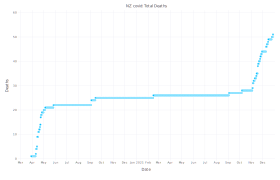

In [16]:
using Gadfly; 
Gadfly.push_theme(:default)
Gadfly.set_default_plot_size(28cm, 18cm)
Gadfly.plot(nz_data, x = :date,y = :total_deaths, Geom.point, Geom.point, Guide.XLabel("Date"), Guide.YLabel("Deaths"),
Guide.Title("NZ covid: Total Deaths"))

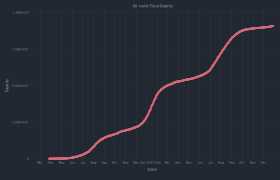

In [17]:
Gadfly.push_theme(:dark)
Gadfly.plot(sa_data, x = :date,y = :total_deaths, Geom.point, Guide.XLabel("Date"), Guide.YLabel("Deaths"),
Guide.Title("SA covid: Total Deaths"))

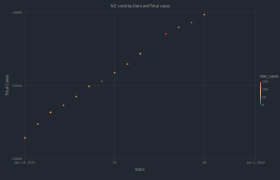

In [18]:
Gadfly.push_theme(:dark)
Gadfly.plot(dtnz, x = :date , y = :total_cases,color = "new_cases" , Geom.point,Guide.XLabel("Date"), Guide.YLabel("Total Cases"),
Guide.Title("NZ covid by Date and Total cases"))

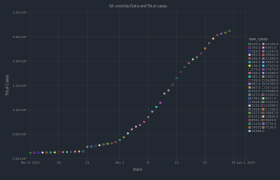

In [19]:
Gadfly.push_theme(:dark)
Gadfly.plot(dtsa, x = :date , y = :total_cases ,color = "new_cases", Geom.point,Guide.XLabel("Date"), Guide.YLabel("Total Cases"),
Guide.Title("SA covid by Date and Total cases"),Scale.color_discrete_manual("green","purple","blue"))

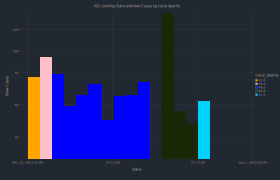

In [20]:
Gadfly.push_theme(:dark)
ticks = [20,50,80,100,120]
Gadfly.plot(dtnz, x = :date , y = :new_cases,color = "total_deaths" ,  Geom.bar, Guide.XLabel("Date"), Guide.YLabel("New Cases"),
Guide.Title("NZ covid by Date and new Cases by total deaths"),Scale.color_discrete_manual("orange","pink","blue"), Guide.yticks(ticks=ticks))

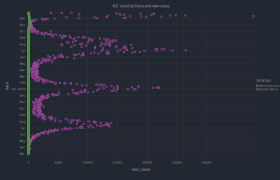

In [21]:
ticks = [0,5000,10000,15000,20000, 25000, 30000]
Gadfly.plot(data, x = "new_cases",y = :date,color = "location",Geom.point, Guide.xticks(ticks=ticks),
Guide.Title("NZ covid by Date and new cases"),Scale.color_discrete_manual("green","purple","blue"))

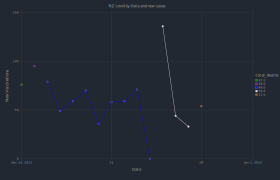

In [22]:
Gadfly.plot(dtnz, x = :date , y = :new_cases,color = "total_deaths" , Geom.point, Geom.line, Guide.XLabel("Date"), Guide.YLabel("New Vaccinations"),
Guide.Title("NZ covid by Date and new cases"),Scale.color_discrete_manual("green","purple","blue"))

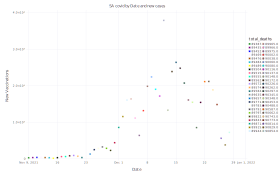

In [23]:
Gadfly.push_theme(:default)
Gadfly.plot(dtsa, x = :date , y = :new_cases,color = "total_deaths" , Geom.point, Geom.line, Guide.XLabel("Date"), Guide.YLabel("New Vaccinations"),
Guide.Title("SA covid by Date and new cases"),Scale.color_discrete_manual("green","purple","blue"))

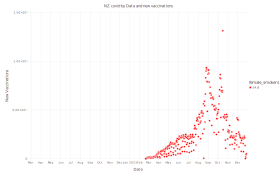

In [24]:
Gadfly.plot(nz_data, x = :date , y = :new_vaccinations,color = "female_smokers" , Geom.point, Guide.XLabel("Date"), Guide.YLabel("New Vaccinations"),
Guide.Title("NZ covid by Date and new vaccinations"),Scale.color_discrete_manual("red","purple","blue"))

In [25]:
Gadfly.push_theme(:default)
ticks = [5000,10000,15000,20000,25000,30000]
Gadfly.plot(dtsa, x = :date , y = :new_cases,color = "total_deaths" ,  Geom.bar, Guide.XLabel("Date"), Guide.YLabel("New Cases"),
Guide.Title("SA covid by Date and new Cases by total deaths"),Scale.color_discrete_manual("green","purple","blue"), Guide.yticks(ticks=ticks))

Plot(...)

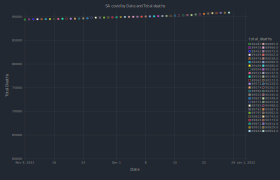

In [26]:
Gadfly.push_theme(:dark)
ticks = [60000,65000,70000,75000,80000, 85000, 90000]
Gadfly.plot(dtsa, x = :date 
    , y = :total_deaths
    ,color = "total_deaths" 
    , Geom.point
    , Geom.line
    , Guide.yticks(ticks=ticks)
    , Guide.XLabel("Date")
    , Guide.YLabel("Total Deaths")
    ,Guide.Title("SA covid by Date and Total deaths")
    ,Scale.color_discrete_manual("green","purple","blue"))